In [3]:
import numpy as np
import pandas as pd


In [5]:
pd.__version__
np.__version__

'1.23.2'

In [14]:
#A1 Please refer to the “Purchase Data” worksheet of Lab Session1 Data.xlsx. Please load the data 
#and segregate them into 2 matrices A & C
purchase_data = pd.read_csv('purchase_data_in_csv_format.csv')

In [22]:
basic_values = purchase_data.iloc[:,1:4]
final_values = purchase_data.iloc[:,4:5]

In [23]:
basic_values

,Candies (#),Mangoes (Kg),Milk Packets (#)
0,20,6,2
1,16,3,6
2,27,6,2
3,19,1,2
4,24,4,2
5,22,1,5
6,15,4,2
7,18,4,2
8,21,1,4
9,16,2,4


In [24]:
final_values

,Payment (Rs)
0,386
1,289
2,393
3,110
4,280
5,167
6,271
7,274
8,148
9,198


In [25]:
final_values.describe()

,Payment (Rs)
count,10.000000
mean,251.600000
std,95.425596
min,110.000000
25%,174.750000
50%,272.500000
75%,286.750000
max,393.000000


In [26]:
basic_values.describe()

,Candies (#),Mangoes (Kg),Milk Packets (#)
count,10.000000,10.000000,10.000000
mean,19.800000,3.200000,3.100000
std,3.823901,1.932184,1.523884
min,15.000000,1.000000,2.000000
25%,16.500000,1.250000,2.000000
50%,19.500000,3.500000,2.000000
75%,21.750000,4.000000,4.000000
max,27.000000,6.000000,6.000000


In [27]:
#What is the dimensionality of the vector space for this data?
basic_values.shape 

(10, 3)

In [28]:
#What is the dimensionality of the vector space for this data?
final_values.shape

(10, 1)

In [29]:
basic_values = purchase_data.iloc[:,1:4].values
final_values = purchase_data.iloc[:,4:5].values


In [30]:
basic_values

array([[20,  6,  2],
       [16,  3,  6],
       [27,  6,  2],
       [19,  1,  2],
       [24,  4,  2],
       [22,  1,  5],
       [15,  4,  2],
       [18,  4,  2],
       [21,  1,  4],
       [16,  2,  4]], dtype=int64)

In [32]:
final_values

array([[386],
       [289],
       [393],
       [110],
       [280],
       [167],
       [271],
       [274],
       [148],
       [198]], dtype=int64)

In [34]:
#What is the rank of Matrix A?
print("the rank of basic values matrix:", np.linalg.matrix_rank(basic_values))
print("the rank of final values matrix:",np.linalg.matrix_rank(final_values))

the rank of basic values matrix: 3
the rank of final values matrix: 1


In [45]:
#A2
#Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products 
#available with the vendor.
print("The Pseudo Inverse of basic values Matrix: ", np.linalg.
pinv(basic_values))

The Pseudo Inverse of basic values Matrix:  [[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]


In [41]:
X = np.dot(psv_basicvalues,final_values)
X

array([[ 1.],
       [55.],
       [18.]])

In [47]:
basic_values = purchase_data.iloc[:,1:4]
final_values = purchase_data.iloc[:,4:5]

In [48]:
basic_values

,Candies (#),Mangoes (Kg),Milk Packets (#)
0,20,6,2
1,16,3,6
2,27,6,2
3,19,1,2
4,24,4,2
5,22,1,5
6,15,4,2
7,18,4,2
8,21,1,4
9,16,2,4


In [49]:
final_values

,Payment (Rs)
0,386
1,289
2,393
3,110
4,280
5,167
6,271
7,274
8,148
9,198


In [115]:
#A3
basic_values["Payment (Rs)"] = final_values["Payment (Rs)"].astype('int64')

In [117]:
#A3. Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others 
#as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on 
#purchase behavior

def RichORpoor(define):
    if(int(define['Payment (Rs)']>200)):
        return 'RICH'
    else:
        return'POOR'
final_values['Payment (Rs)'] = final_values.apply(RichORpoor, axis=1)

In [118]:
final_values

,Payment (Rs)
0,RICH
1,RICH
2,RICH
3,POOR
4,RICH
5,POOR
6,RICH
7,RICH
8,POOR
9,POOR


In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
logistic_regression = LogisticRegression()


In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(basic_values, final_values,
test_size=0.30, random_state=42)

In [123]:
logistic_regression.fit(X_train,y_train.values.ravel())


LogisticRegression()

In [124]:
y_prediction=logistic_regression.predict(X_test)

In [125]:
y_prediction

array(['POOR', 'POOR', 'POOR'], dtype=object)

In [126]:
X_test

,Candies (#),Mangoes (Kg),Milk Packets (#)
8,21,1,4
1,16,3,6
5,22,1,5


Text(0.5, 1.0, 'Conf Matrix - Logistic Regression')

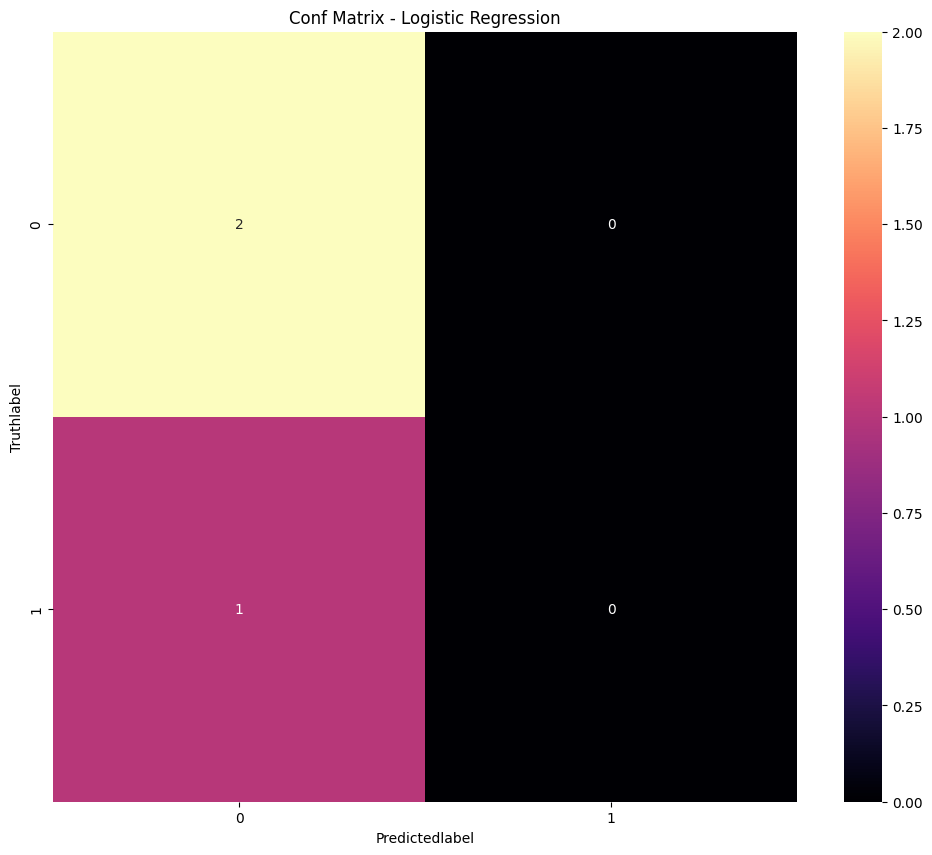

In [131]:
from sklearn.metrics import confusion_matrix #confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (12,10))
sn.heatmap(cm, annot=True, cmap= 'magma', fmt='d', cbar=True)
plt.xlabel('Predictedlabel')
plt.ylabel('Truthlabel')
plt.title('Conf Matrix - Logistic Regression')

In [128]:
import pandas as pd
import numpy as np

In [173]:
#A4 Please refer to the data present in “IRCTC Stock Price” data sheet of the above excel file. Do the 
#following after loading the data to your programming platform.

irctc_data = pd.read_csv('irctc_d_csv.csv')

In [174]:
irctc_stockprice = pd.DataFrame(irctc_data)

In [175]:
irctc_stockprice

,Open,High,Low,Volume,Month,Date,Day,Year,Price,Chg
0,"2,092.00","2,126.90","2,065.05",1670000,Jun,29,Tue,2021,2081.85,0.0020
1,"2,084.00","2,112.45","2,068.40",707730,Jun,28,Mon,2021,2077.75,0.0043
2,"2,084.35","2,088.50","2,053.10",475820,Jun,25,Fri,2021,2068.85,-0.0020
3,"2,098.00","2,098.00","2,066.00",541510,Jun,24,Thu,2021,2072.95,-0.0026
4,"2,102.00","2,111.40","2,072.00",809620,Jun,23,Wed,2021,2078.25,-0.0023
...,...,...,...,...,...,...,...,...,...,...
244,"1,410.00","1,411.00","1,390.05",480210,Jul,7,Tue,2020,1397.40,-0.0024
245,"1,405.50","1,415.50","1,394.00",614930,Jul,6,Mon,2020,1400.75,-0.0031
246,"1,415.00","1,425.00","1,398.00",599490,Jul,3,Fri,2020,1405.10,-0.0051
247,"1,440.00","1,467.80","1,395.30",2160000,Jul,2,Thu,2020,1412.35,0.0362


In [176]:
irctc_data.shape

(249, 10)

In [159]:
irctc_data.head()

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,"Jun 29, 2021",Jun,Tue,"2,081.85","2,092.00","2,126.90","2,065.05",1.67M,0.20%
1,"Jun 28, 2021",Jun,Mon,"2,077.75","2,084.00","2,112.45","2,068.40",707.73K,0.43%
2,"Jun 25, 2021",Jun,Fri,"2,068.85","2,084.35","2,088.50","2,053.10",475.82K,-0.20%
3,"Jun 24, 2021",Jun,Thu,"2,072.95","2,098.00","2,098.00","2,066.00",541.51K,-0.26%
4,"Jun 23, 2021",Jun,Wed,"2,078.25","2,102.00","2,111.40","2,072.00",809.62K,-0.23%


In [177]:
#Calculate the mean and variance of the Price data present in column D.
irctc_data.describe()

,Volume,Date,Year,Price,Chg
count,2.490000e+02,249.000000,249.000000,249.000000,249.000000
mean,1.516055e+06,15.534137,2020.485944,1560.663454,0.001964
std,2.011121e+06,8.768060,0.500809,242.347613,0.022488
min,8.450000e+04,1.000000,2020.000000,1300.550000,-0.102000
25%,3.939900e+05,8.000000,2020.000000,1366.500000,-0.006400
50%,9.374900e+05,16.000000,2020.000000,1438.250000,0.000000
75%,1.780000e+06,23.000000,2021.000000,1747.400000,0.009100
max,1.719000e+07,31.000000,2021.000000,2144.850000,0.139700


In [178]:
#Calculate the mean and variance of the Price data present in column D.
print("Variance : ", irctc_data['Price'].var())

Variance :  58732.36535253918


In [179]:
#Select the price data for all Wednesdays and calculate the sample mean. Compare the mean 
#with the population mean and note your observations.
irctc_wednesday = irctc_data.loc[irctc_data['Day'] == 'Wed', 'Price']

In [180]:
irctc_wednesday

4      2078.25
9      2089.95
14     2071.20
19     1917.95
24     1894.05
29     1858.10
33     1746.60
38     1723.65
43     1795.85
56     1709.00
60     1757.00
64     1760.55
69     1824.00
73     2018.50
78     1886.10
83     1675.45
88     1698.65
93     1618.40
98     1469.35
103    1438.25
107    1452.70
112    1461.15
117    1483.45
122    1434.95
126    1411.55
131    1423.40
136    1617.75
141    1349.90
145    1353.90
150    1365.30
154    1371.25
159    1300.55
164    1333.35
169    1331.75
174    1338.05
179    1356.90
183    1384.00
188    1372.85
193    1367.40
198    1348.90
203    1359.75
208    1369.30
213    1361.80
218    1386.80
223    1336.95
228    1352.75
233    1372.95
238    1351.95
243    1390.10
248    1363.05
Name: Price, dtype: float64

In [181]:
irctc_wednesday.describe()

count      50.000000
mean     1550.706000
std       240.706357
min      1300.550000
25%      1362.112500
50%      1429.175000
75%      1740.862500
max      2089.950000
Name: Price, dtype: float64

In [182]:
#Select the price data for the month of Apr and calculate the sample mean. Compare the 
#mean with the population mean and note your observations.
irctc_april = irctc_data.loc[irctc_data['Month'] == 'Apr', 'Price']

In [183]:
irctc_april

41    1791.40
42    1792.55
43    1795.85
44    1793.20
45    1730.85
46    1712.00
47    1673.05
48    1640.05
49    1612.70
50    1627.45
51    1608.10
52    1611.65
53    1582.00
54    1730.90
55    1726.40
56    1709.00
57    1688.55
58    1702.65
59    1751.75
Name: Price, dtype: float64

In [185]:
irctc_april.describe()

count      19.000000
mean     1698.952632
std        69.839973
min      1582.000000
25%      1633.750000
50%      1709.000000
75%      1741.325000
max      1795.850000
Name: Price, dtype: float64

In [199]:
#From the Chg% (available in column I) find the probability of making a loss over the stock.
count_positive = irctc_data['Chg'].gt(0).sum()


In [200]:
print(count_positive)

124


In [201]:
 count_negative = irctc_data['Chg'].lt(0).sum()


In [202]:
print(count_negative)

124


In [203]:
loss_perc = (count_negative)/(count_negative + count_positive)
print(loss_perc)

0.5


In [204]:
irctc_data

,Open,High,Low,Volume,Month,Date,Day,Year,Price,Chg
0,"2,092.00","2,126.90","2,065.05",1670000,Jun,29,Tue,2021,2081.85,0.0020
1,"2,084.00","2,112.45","2,068.40",707730,Jun,28,Mon,2021,2077.75,0.0043
2,"2,084.35","2,088.50","2,053.10",475820,Jun,25,Fri,2021,2068.85,-0.0020
3,"2,098.00","2,098.00","2,066.00",541510,Jun,24,Thu,2021,2072.95,-0.0026
4,"2,102.00","2,111.40","2,072.00",809620,Jun,23,Wed,2021,2078.25,-0.0023
...,...,...,...,...,...,...,...,...,...,...
244,"1,410.00","1,411.00","1,390.05",480210,Jul,7,Tue,2020,1397.40,-0.0024
245,"1,405.50","1,415.50","1,394.00",614930,Jul,6,Mon,2020,1400.75,-0.0031
246,"1,415.00","1,425.00","1,398.00",599490,Jul,3,Fri,2020,1405.10,-0.0051
247,"1,440.00","1,467.80","1,395.30",2160000,Jul,2,Thu,2020,1412.35,0.0362


In [205]:
#Calculate the probability of making a profit on Wednesday.
#Calculate the conditional probability of making profit, given that today is Wednesday.
irctc_wed_chg = irctc_data.loc[irctc_data['Day'] == 'Wed',
[False,False,False,False,False,False,False,False,True,True]]

In [206]:
irctc_wed_chg

,Price,Chg
4,2078.25,-0.0023
9,2089.95,-0.0038
14,2071.20,-0.0343
19,1917.95,0.0123
24,1894.05,-0.0073
29,1858.10,0.0126
33,1746.60,-0.0255
38,1723.65,-0.0263
43,1795.85,0.0015
56,1709.00,0.0121


In [207]:
count_positive = irctc_wed_chg['Chg'].gt(0).sum()

In [208]:
print(count_positive)

21


In [209]:
count_negative = irctc_wed_chg['Chg'].lt(0).sum()


In [210]:
print(count_negative)

29


In [211]:
loss_perc = (count_negative)/(count_negative + count_positive)
print(loss_perc)


0.58


<AxesSubplot:xlabel='Chg', ylabel='Day'>

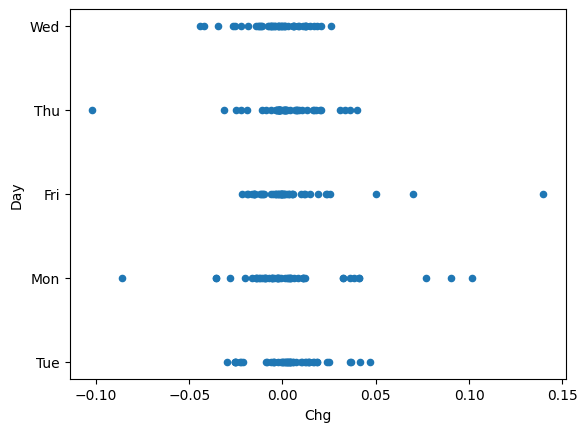

In [214]:
#Make a scatter plot of Chg% data against the day of the week
irctc_data.plot.scatter(x='Chg',y='Day')